In [2]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Store data as DataFrame

raw_game_data = "vg_sales_updated.csv"
game_data_df = pd.read_csv(raw_game_data)
game_data_df.head()

,rank,game_title,platform,year,genre,publisher,developer,critic_score,user_score,north_america,europe,japan,rest_of_world,global
0,1,Wii Sports,Wii,2006,Sports,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,Nintendo EAD,8.2,9.1,15.91,12.92,3.80,3.35,35.98
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,Nintendo EAD,8.0,8.8,15.61,10.99,3.29,3.02,32.90
4,5,Pokémon Red / Green / Blue Version,GB,1998,Role-Playing,Nintendo,Game Freak,9.4,NaN,11.27,8.89,10.22,1.00,31.37


In [4]:
# Find how many games per publisher

game_qty_df = game_data_df['publisher'].value_counts()

game_qty_df.head()

publisher
Electronic Arts                322
Nintendo                       243
Sony Computer Entertainment    138
Activision                     118
Nintendo                       102
Name: count, dtype: int64

In [5]:
# Find the overall sales
 
sum_by_publisher = game_data_df.groupby('publisher')[['north_america', 'europe', 'japan', 'rest_of_world', 'global']].sum()

sum_by_publisher.head()

,north_america,europe,japan,rest_of_world,global
publisher,,,,,
2K Games,1.00,0.53,0.00,0.17,1.70
2K Sports,2.56,0.66,0.05,0.71,3.98
3DO,1.57,0.46,0.00,0.10,2.13
505 Games,8.29,5.80,0.16,1.66,15.91
989 Studios,6.99,1.98,0.02,0.39,9.39


In [6]:
# Create DataFrame with both Sales and Game Qty

merged_df = pd.merge(game_qty_df, sum_by_publisher, on="publisher")

merged_df.head()

,count,north_america,europe,japan,rest_of_world,global
publisher,,,,,,
Electronic Arts,322,312.47,163.54,5.22,54.87,536.05
Nintendo,243,396.51,175.76,237.86,37.87,848.04
Sony Computer Entertainment,138,116.74,80.43,34.35,28.99,260.56
Activision,118,124.14,66.80,1.53,18.80,211.23
Nintendo,102,497.01,316.29,231.98,72.85,1117.99


In [7]:
# Caluculate Rankings

merged_df["North America Ave/Game"] = merged_df['north_america'] / merged_df['count']
merged_df["Europe Ave/Game"] = merged_df['europe'] / merged_df['count']
merged_df["Japan Ave/Game"] = merged_df['japan'] / merged_df['count']
merged_df["Rest of World Ave/Game"] = merged_df['rest_of_world'] / merged_df['count']
merged_df["Global Ave/Game"] = merged_df['global'] / merged_df['count']

merged_df.to_csv("./merged.csv")
merged_df = pd.read_csv("./merged.csv")
merged_df.head()



,publisher,count,north_america,europe,japan,rest_of_world,global,North America Ave/Game,Europe Ave/Game,Japan Ave/Game,Rest of World Ave/Game,Global Ave/Game
0,Electronic Arts,322,312.47,163.54,5.22,54.87,536.05,0.970404,0.507888,0.016211,0.170404,1.664752
1,Nintendo,243,396.51,175.76,237.86,37.87,848.04,1.631728,0.723292,0.978848,0.155844,3.489877
2,Sony Computer Entertainment,138,116.74,80.43,34.35,28.99,260.56,0.845942,0.582826,0.248913,0.210072,1.888116
3,Activision,118,124.14,66.80,1.53,18.80,211.23,1.052034,0.566102,0.012966,0.159322,1.790085
4,Nintendo,102,497.01,316.29,231.98,72.85,1117.99,4.872647,3.100882,2.274314,0.714216,10.960686


In [8]:
# North American Data

NA_data = merged_df[["publisher", "North America Ave/Game"]]
NA_data2 = NA_data.sort_values(by=['North America Ave/Game'], ascending=False)
NA_data3 = NA_data2.reset_index()
NA_data4 = NA_data3.drop(["index"], axis=1)


print(f"The best sales per game is {NA_data4.loc[0]['publisher']}")
print(f"The worst sales per game is {NA_data4['publisher'].iloc[-1]}")
NA_data4.head()

best_pub_sales = pd.DataFrame({ 'Region': "North America",
                               'Publisher': [NA_data4.loc[0]['publisher']],
                               'Sales per Game': NA_data4.loc[0]['North America Ave/Game']})



The best sales per game is Microsoft Game Studios  
The worst sales per game is Tripwire Interactive  


In [9]:
# Europe Data

Europe_data = merged_df[["publisher", "Europe Ave/Game"]]
Europe_data2 = Europe_data.sort_values(by=['Europe Ave/Game'], ascending=False)
Europe_data3 = Europe_data2.reset_index()
Europe_data4 = Europe_data3.drop(["index"], axis=1)


print(f"The best sales per game is {Europe_data4.loc[0]['publisher']}")
print(f"The worst sales per game is {Europe_data4['publisher'].iloc[-1]}")
Europe_data4.head()

best_pub_sales.loc[len(best_pub_sales.index)] = ['Europe', Europe_data4.loc[0]['publisher'], Europe_data4.loc[0]['Europe Ave/Game']]


The best sales per game is Rockstar Games  
The worst sales per game is Tripwire Interactive  


In [10]:
# Rest of World Data

ROW_data = merged_df[["publisher", "Rest of World Ave/Game"]]
ROW_data2 = ROW_data.sort_values(by=['Rest of World Ave/Game'], ascending=False)
ROW_data3 = ROW_data2.reset_index()
ROW_data4 = ROW_data3.drop(["index"], axis=1)


print(f"The best sales per game is {ROW_data4.loc[0]['publisher']}")
print(f"The worst sales per game is {ROW_data4['publisher'].iloc[-1]}")
ROW_data4.head()

best_pub_sales.loc[len(best_pub_sales.index)] = ['Rest of World', ROW_data4.loc[0]['publisher'], ROW_data4.loc[0]['Rest of World Ave/Game']]


The best sales per game is Rockstar Games  
The worst sales per game is Tripwire Interactive  


In [11]:
# Japan Data

Japan_data = merged_df[["publisher", "Japan Ave/Game"]]
Japan_data2 = Japan_data.sort_values(by=['Japan Ave/Game'], ascending=False)
Japan_data3 = Japan_data2.reset_index()
Japan_data4 = Japan_data3.drop(["index"], axis=1)


print(f"The best sales per game is {Japan_data4.loc[0]['publisher']}")
print(f"The worst sales per game is {Japan_data4['publisher'].iloc[-1]}")
Japan_data4.head()

best_pub_sales.loc[len(best_pub_sales.index)] = ['Japan', Japan_data4.loc[0]['publisher'], Japan_data4.loc[0]['Japan Ave/Game']]

The best sales per game is Square  
The worst sales per game is Tripwire Interactive  


In [12]:
# Global Data

Global_data = merged_df[["publisher", "Global Ave/Game"]]
Global_data2 = Global_data.sort_values(by=['Global Ave/Game'], ascending=False)
Global_data3 = Global_data2.reset_index()
Global_data4 = Global_data3.drop(["index"], axis=1)


print(f"The best sales per game is {Global_data4.loc[0]['publisher']}")
print(f"The worst sales per game is {Global_data4['publisher'].iloc[-1]}")
Global_data4.head()

best_pub_sales.loc[len(best_pub_sales.index)] = ['Global', Global_data4.loc[0]['publisher'], Global_data4.loc[0]['Global Ave/Game']]

The best sales per game is Rockstar Games  
The worst sales per game is Tripwire Interactive  


          Region                 Publisher  Sales per Game
2  Rest of World          Rockstar Games          2.307692
3          Japan                  Square          2.755000
1         Europe          Rockstar Games          4.286923
0  North America  Microsoft Game Studios          5.953333
4         Global          Rockstar Games         12.304615


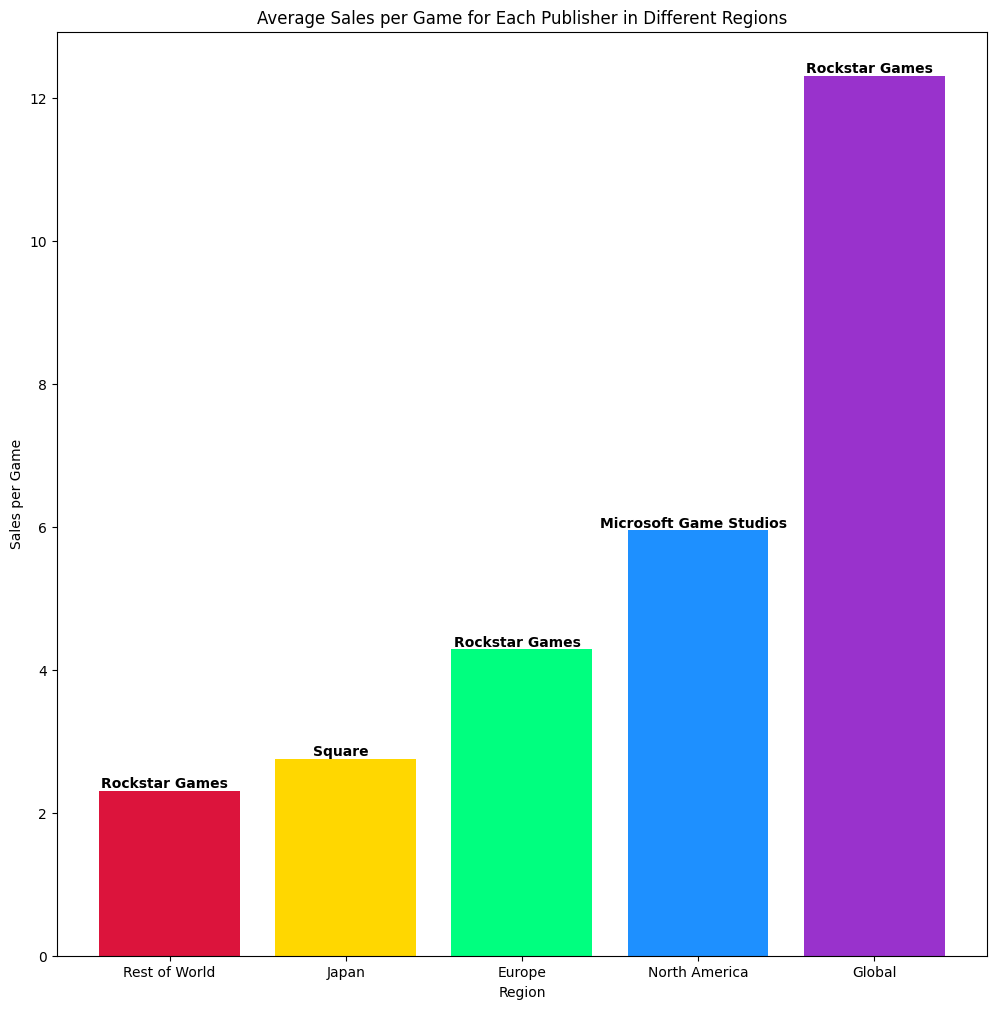

In [22]:
best_pub_sales1 = best_pub_sales.sort_values(by = 'Sales per Game', ascending = True)
print(best_pub_sales1)



# Create the bar plot
plt.figure(figsize=(12, 12))
plt.bar(best_pub_sales1['Region'], best_pub_sales1['Sales per Game'], color =['crimson', 'gold', 'springgreen', 'dodgerblue', 'darkorchid'])


# Add labels to each bar
for index, row in best_pub_sales1.iterrows():
    plt.text(row['Region'], row['Sales per Game'], row['Publisher'], ha='center', va='bottom', fontweight='bold')


    
# Add labels and title
plt.xlabel('Region')
plt.ylabel('Sales per Game')
plt.title('Average Sales per Game for Each Publisher in Different Regions')

plt.savefig('Publisher.png')

# Show the plot
plt.show()